# Importing and analyzing reddit dataset

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer


/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,num_comments,score,created_utc,subreddit,text,compound,positive,neutral,negative
0,0,3,1201232574,microsoft,windows in be careful what you wish for,0.5106,0.417,0.583,0.000
1,0,1,1201327573,microsoft,dueling fools microsoft bear,-0.4939,0.000,0.484,0.516
2,0,0,1202287964,microsoft,windows seven enough already,0.0000,0.000,1.000,0.000
3,0,2,1202341158,microsoft,microsoftyahoo merger a flickr perspective,0.0000,0.000,1.000,0.000
4,0,0,1202398017,microsoft,microsoft steals yahoo,-0.5106,0.000,0.377,0.623


In [ ]:
#reading cleaned dataset
csv = './reddit_text_sentiment.csv'
reddit_df = pd.read_csv(csv,index_col=0)
reddit_df.head()

In [178]:
len(reddit_df["subreddit"].unique())
len(reddit_df["subreddit"])

4705320

In [179]:
#str.lower to bbe able to join support tables
reddit_df["subreddit"] = reddit_df["subreddit"].str.lower()

In [180]:
#combining with three other dataframes to get: Brand company name, Sector, other name
#reading datsets
companies_dataset = pd.read_csv("../TwitterAPI/tables/companies.csv")
index_dataset = pd.read_csv("../TwitterAPI/tables/index_names.csv")
industries_dataset = pd.read_csv("../TwitterAPI/tables/companies_industries.csv")

In [181]:
index_dataset = index_dataset.rename(columns={"company": "subreddit"})
index_dataset["subreddit"] = index_dataset["subreddit"].str.lower()
index_dataset = index_dataset.drop_duplicates(subset ="subreddit", keep = "first") 

In [182]:
reddit_df = reddit_df.merge(index_dataset, on='subreddit', how='left')
reddit_df = reddit_df.merge(companies_dataset, on='index', how='left')
reddit_df = reddit_df.rename(columns={"Company": "company_name", "index": "company_id"})
reddit_df = reddit_df.merge(industries_dataset, on='company_id', how='left')

In [183]:
len(reddit_df["company_name_y"].unique())

30

In [184]:
reddit_df[reddit_df["company_name_y"] == 'Amazon.com, Inc.']

,num_comments,score,created_utc,subreddit,text,compound,positive,neutral,negative,company_id,...,location,district,datastart,dataend,nuber,ticketname,stockindex,company_name_y,industry_id,industry_name
2139950,1,1,1215111732,amazon,lady chesterton's review of storey's guide to ...,0.0000,0.000,1.000,0.00,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Amazon.com, Inc.",1,Technology
2139951,0,1,1215661492,amazon,astore submit free amazon online directory su...,0.6124,0.455,0.545,0.00,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Amazon.com, Inc.",1,Technology
2139952,0,1,1221541431,amazon,amazons imdb finally adds video content,-0.0258,0.000,0.820,0.18,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Amazon.com, Inc.",1,Technology
2139953,1,4,1242850315,amazon,the patrick bateman skincare routine,0.0000,0.000,1.000,0.00,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Amazon.com, Inc.",1,Technology
2139954,1,4,1254457760,amazon,the kid who sued amazon for eating his homewor...,0.6597,0.265,0.735,0.00,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Amazon.com, Inc.",1,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464466,2,1,1577171805,zappos,unused promo code lekpdnsdebcwaenjoy,0.0000,0.000,1.000,0.00,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Amazon.com, Inc.",1,Technology
2464467,0,1,1577332816,zappos,promo code i'm asking cashapp for mine pm if...,0.4019,0.231,0.769,0.00,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Amazon.com, Inc.",1,Technology
2464468,1,1,1577806952,zappos,last day for off coupons,0.0000,0.000,1.000,0.00,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Amazon.com, Inc.",1,Technology
2464469,0,1,1579061179,zappos,coupon looking for a off zappos coupon that ...,0.3612,0.200,0.800,0.00,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Amazon.com, Inc.",1,Technology


In [185]:
reddit_df["company_name_y"].unique()

array(['Microsoft Corporation', 'Apple Inc.', 'Amazon.com, Inc.',
       'Facebook, Inc.', 'Alphabet Inc', 'Uber Technologies, Inc.',
       'Dell Technologies Inc.', 'HP Inc.', 'Twitter, Inc.', 'eBay Inc.',
       'Lyft, Inc.', 'Snap Inc.', 'Spotify Technology S.A.',
       'Grubhub Inc.', 'AT&T Inc.', 'T-Mobile US Inc.',
       'Sprint Corporation', 'Verizon Communications Inc.',
       'JPMorgan Chase & Co.', 'Citigroup Inc.', 'Bank of America',
       'Wells Fargo & Company', 'PayPal Holdings, Inc.',
       'The American Express Company',
       'Capital One Financial Corporation', 'Netflix, Inc.',
       'DISH Network Corporation', 'Comcast Corporation',
       'ViacomCBS Inc.', 'Fox Corporation'], dtype=object)

In [267]:
reddit_df["date"].max()

datetime.date(2020, 3, 20)

In [187]:
reddit_df

,num_comments,score,created_utc,subreddit,text,compound,positive,neutral,negative,company_id,...,location,district,datastart,dataend,nuber,ticketname,stockindex,company_name_y,industry_id,industry_name
0,0,3,1201232574,microsoft,windows in be careful what you wish for,0.5106,0.417,0.583,0.000,1,...,Redmond,WA,1975.0,1986.0,1,MSFT,NASDAQ,Microsoft Corporation,1,Technology
1,0,1,1201327573,microsoft,dueling fools microsoft bear,-0.4939,0.000,0.484,0.516,1,...,Redmond,WA,1975.0,1986.0,1,MSFT,NASDAQ,Microsoft Corporation,1,Technology
2,0,0,1202287964,microsoft,windows seven enough already,0.0000,0.000,1.000,0.000,1,...,Redmond,WA,1975.0,1986.0,1,MSFT,NASDAQ,Microsoft Corporation,1,Technology
3,0,2,1202341158,microsoft,microsoftyahoo merger a flickr perspective,0.0000,0.000,1.000,0.000,1,...,Redmond,WA,1975.0,1986.0,1,MSFT,NASDAQ,Microsoft Corporation,1,Technology
4,0,0,1202398017,microsoft,microsoft steals yahoo,-0.5106,0.000,0.377,0.623,1,...,Redmond,WA,1975.0,1986.0,1,MSFT,NASDAQ,Microsoft Corporation,1,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4705315,0,1,1584507656,foxnews,how fox rhetoric on covid has shifted,0.0000,0.000,1.000,0.000,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fox Corporation,5,Cable & Streaming
4705316,11,1,1584567961,foxnews,the fox 'news' shuffle must pain fox to put th...,-0.5673,0.033,0.865,0.102,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fox Corporation,5,Cable & Streaming
4705317,40,1,1584595280,foxnews,fox news and our president failing miserably h...,-0.7506,0.000,0.484,0.516,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fox Corporation,5,Cable & Streaming
4705318,0,1,1584661646,foxnews,the five full show trump breaking news march,0.0000,0.000,1.000,0.000,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fox Corporation,5,Cable & Streaming


In [188]:
twitter_stocks

,company_id,industry_id,date,overall,positive,negative,neutral,change_percent
0,23,3,2017-01-17,0.192433,0.140295,0.040446,0.819267,-2.0636
1,23,3,2017-01-18,0.164156,0.133215,0.047739,0.819035,1.4047
2,23,3,2017-01-19,0.158477,0.130572,0.048721,0.820712,-1.9697
3,23,3,2017-01-20,0.172023,0.136606,0.045839,0.817556,0.2870
4,23,3,2017-01-23,0.154186,0.134041,0.051439,0.814524,-0.0440
...,...,...,...,...,...,...,...,...
37175,20,3,2020-02-27,0.196590,0.118910,0.051424,0.829673,-4.8972
37176,20,3,2020-02-28,0.216627,0.130245,0.049570,0.820192,-2.1627
37177,20,3,2020-03-02,0.207522,0.119663,0.048932,0.831396,3.0526
37178,20,3,2020-03-03,0.207606,0.119507,0.048603,0.831879,-5.5158


There are 30 companies in dataset. 

In [189]:
reddit_df['clean_length'] = [len(t) for t in reddit_df.text]


In [190]:
reddit_df.describe()

,num_comments,score,created_utc,compound,positive,neutral,negative,company_id,Unnamed: 2,Unnamed: 3,datastart,dataend,industry_id,clean_length
count,4.705320e+06,4.705320e+06,4.705320e+06,4.705320e+06,4.705320e+06,4.705320e+06,4.705320e+06,4.705320e+06,0.0,0.0,4.019635e+06,4.019635e+06,4.705320e+06,4.705320e+06
mean,7.873101e+00,1.280195e+01,1.488968e+09,1.604603e-01,1.034655e-01,8.387459e-01,5.489317e-02,5.817344e+00,NaN,NaN,1.983499e+03,1.993110e+03,1.208297e+00,2.513734e+02
std,9.336004e+01,2.052405e+02,7.011724e+07,4.608391e-01,1.397847e-01,1.693781e-01,1.050577e-01,6.837762e+00,NaN,NaN,1.929816e+01,2.239114e+01,7.925916e-01,4.385282e+02
min,-6.000000e+00,0.000000e+00,1.201233e+09,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,1.799000e+03,9.000000e+00,1.000000e+00,1.000000e+00
25%,0.000000e+00,1.000000e+00,1.444141e+09,0.000000e+00,0.000000e+00,7.590000e-01,0.000000e+00,2.000000e+00,NaN,NaN,1.975000e+03,1.980000e+03,1.000000e+00,4.600000e+01
50%,2.000000e+00,1.000000e+00,1.503500e+09,0.000000e+00,5.400000e-02,8.680000e-01,0.000000e+00,3.000000e+00,NaN,NaN,1.976000e+03,1.986000e+03,1.000000e+00,9.700000e+01
75%,6.000000e+00,2.000000e+00,1.545078e+09,5.106000e-01,1.580000e-01,1.000000e+00,7.000000e-02,6.000000e+00,NaN,NaN,1.998000e+03,2.004000e+03,1.000000e+00,3.150000e+02
max,1.127130e+05,6.872400e+04,1.584677e+09,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.210000e+02,NaN,NaN,2.011000e+03,2.018000e+03,5.000000e+00,3.908500e+04


In [191]:
data = reddit_df.groupby(['company_id']).agg(['count'])

In [192]:
data.describe()

,num_comments,score,created_utc,subreddit,text,compound,positive,neutral,negative,Unnamed: 2,...,district,datastart,dataend,nuber,ticketname,stockindex,company_name_y,industry_id,industry_name,clean_length
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,30.0,...,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,1.568440e+05,1.568440e+05,1.568440e+05,1.568440e+05,1.568440e+05,1.568440e+05,1.568440e+05,1.568440e+05,1.568440e+05,0.0,...,1.339878e+05,1.339878e+05,1.339878e+05,1.339878e+05,1.339878e+05,1.339771e+05,1.568440e+05,1.568440e+05,1.568440e+05,1.568440e+05
std,2.967479e+05,2.967479e+05,2.967479e+05,2.967479e+05,2.967479e+05,2.967479e+05,2.967479e+05,2.967479e+05,2.967479e+05,0.0,...,2.980443e+05,2.980443e+05,2.980443e+05,2.980443e+05,2.980443e+05,2.980493e+05,2.967479e+05,2.967479e+05,2.967479e+05,2.967479e+05
min,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01
25%,4.054500e+03,4.054500e+03,4.054500e+03,4.054500e+03,4.054500e+03,4.054500e+03,4.054500e+03,4.054500e+03,4.054500e+03,0.0,...,1.950000e+01,1.950000e+01,1.950000e+01,1.950000e+01,1.950000e+01,0.000000e+00,4.054500e+03,4.054500e+03,4.054500e+03,4.054500e+03
50%,3.398850e+04,3.398850e+04,3.398850e+04,3.398850e+04,3.398850e+04,3.398850e+04,3.398850e+04,3.398850e+04,3.398850e+04,0.0,...,6.591500e+03,6.591500e+03,6.591500e+03,6.591500e+03,6.591500e+03,6.591500e+03,3.398850e+04,3.398850e+04,3.398850e+04,3.398850e+04
75%,1.043708e+05,1.043708e+05,1.043708e+05,1.043708e+05,1.043708e+05,1.043708e+05,1.043708e+05,1.043708e+05,1.043708e+05,0.0,...,9.126900e+04,9.126900e+04,9.126900e+04,9.126900e+04,9.126900e+04,9.126900e+04,1.043708e+05,1.043708e+05,1.043708e+05,1.043708e+05
max,1.225550e+06,1.225550e+06,1.225550e+06,1.225550e+06,1.225550e+06,1.225550e+06,1.225550e+06,1.225550e+06,1.225550e+06,0.0,...,1.225550e+06,1.225550e+06,1.225550e+06,1.225550e+06,1.225550e+06,1.225550e+06,1.225550e+06,1.225550e+06,1.225550e+06,1.225550e+06


# Comparing Twitter and Reddit Sentiment per company

In [193]:
data = reddit_df[['company_name_y', "compound", "positive", "neutral", "negative"]].groupby(['company_name_y'],as_index=False).agg(['mean'], as_index = False)
data = data.reset_index()
data.columns = ["company_name","compound_reddit", "positive_reddit", "negative_reddit", "neutral_reddit"]

In [194]:
data.sort_values(by=['compound_reddit'], ascending=False)

,company_name,compound_reddit,positive_reddit,negative_reddit,neutral_reddit
23,The American Express Company,0.411185,0.118674,0.847889,0.033437
2,"Amazon.com, Inc.",0.241113,0.114493,0.833394,0.051749
20,Spotify Technology S.A.,0.224441,0.137284,0.818602,0.042403
21,Sprint Corporation,0.224025,0.087026,0.867653,0.045120
5,Capital One Financial Corporation,0.216395,0.103542,0.837223,0.059231
26,Verizon Communications Inc.,0.211858,0.080369,0.874120,0.045212
22,T-Mobile US Inc.,0.207389,0.082070,0.874822,0.042880
19,Snap Inc.,0.191616,0.138242,0.796213,0.061587
9,Dell Technologies Inc.,0.191398,0.085546,0.862513,0.051645
14,JPMorgan Chase & Co.,0.189636,0.106669,0.840976,0.052351


In [195]:
#combining reddit data with twitter data
twitter_dataset = pd.read_csv("../TwitterAPI/tables/twitter_sentiment.csv")

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning:

Columns (10,11,14,15) have mixed types.Specify dtype option on import or set low_memory=False.



In [196]:
twitter_dataset["company_name"].unique()

array(['Truist Financial Corp.', 'The PNC Financial Services Group, Inc.',
       'Wells Fargo & Company', 'Twitter, Inc.', 'HP Inc.',
       'Dell Technologies Inc.', 'Uber Technologies, Inc.',
       'Amazon.com, Inc.', 'Microsoft Corporation', 'Apple Inc.',
       'Facebook, Inc.', "Macy's, Inc.", 'Nordstrom, Inc.',
       "Kohl's Corporation", 'CVS Health Corporation',
       'The Procter & Gamble Company', 'Colgate-Palmolive Company',
       'Walgreens Boots Alliance, Inc.', 'The Coca-Cola Company',
       'Levi Strauss & Co.', 'Costco Wholesale Corporation',
       'The TJX Companies, Inc.', 'Walmart Inc.', 'Target Corporation',
       "Lowe's Companies, Inc.", 'Ross Stores, Inc.',
       'Dollar General Corporation', 'Best Buy Co., Inc.', 'Alphabet Inc',
       'American Airlines, Inc.', 'United Airlines Holdings, Inc.',
       'Alaska Air Group, Inc.', 'Spirit Airlines, Inc.', 'eBay Inc.',
       'Lyft, Inc.', 'Snap Inc.', 'JPMorgan Chase & Co.',
       'Bank of America', 'U.S.

In [197]:
data_2 = twitter_dataset[['company_name', "overall_sentiment", "positive_sentiment", "negative_sentiment", "neutral_sentiment"]].groupby(['company_name']).agg(['mean'])

In [198]:
twitter_dataset_2 = twitter_dataset.copy()

In [199]:
twitter_dataset_2["industry_name"] = twitter_dataset_2["industry_name"].replace({"Consumer Banking": "Banking", 
                     "Pharmacy & Drugs":"Pharmacy", "Food & Beverages": "Food", "Clothing & Apparel": "Clothing"})

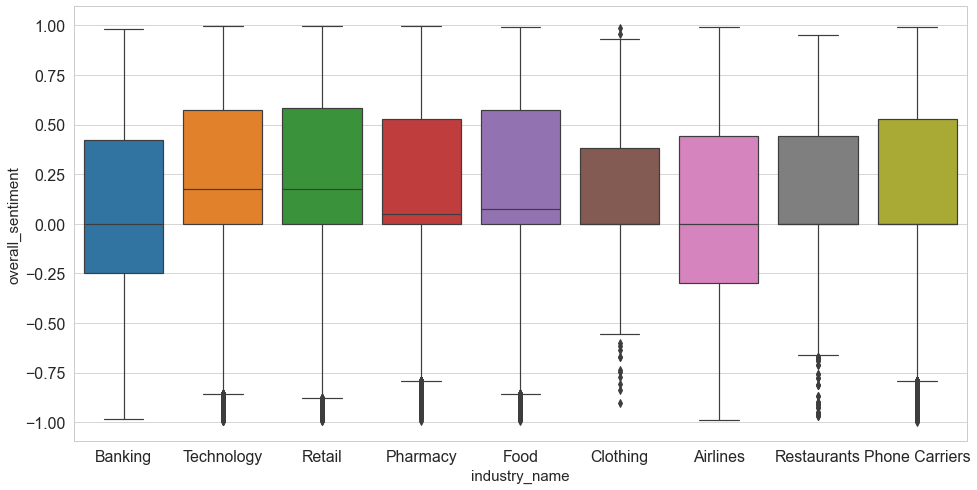

In [200]:

plt.figure(figsize=(16, 8))

sns.set_context("paper", font_scale=1.8, rc={"font.size":20,"axes.labelsize":15})
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'industry_name', y = 'overall_sentiment', data =twitter_dataset_2) 


#twitter_dataset.boxplot(by ='industry_name', column =['overall_sentiment'], grid = False) 


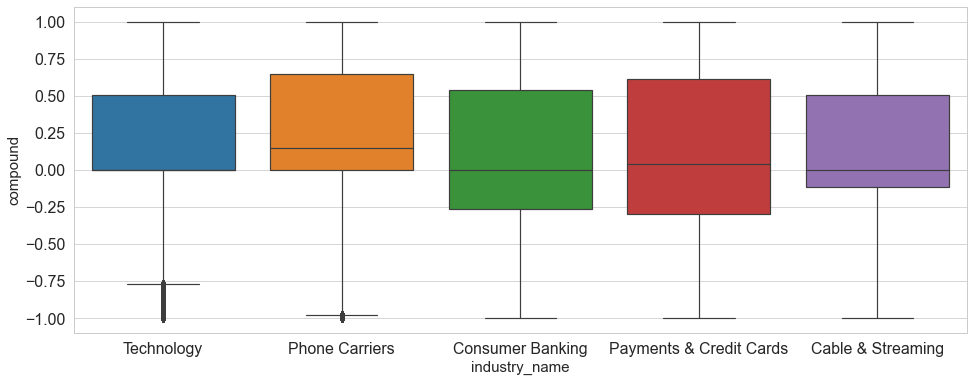

In [201]:
plt.figure(figsize=(16, 6))

sns.set_style("whitegrid") 
  
sns.boxplot(x = 'industry_name', y = 'compound', data = reddit_df) 

#twitter_dataset.boxplot(by ='industry_name', column =['overall_sentiment'], grid = False) 

In [202]:
data = data.rename(columns={"company_name_y": "company_name"})
data_2 = data_2.reset_index()
data_2.columns=["company_name","compound_twitter", "positive_twitter", "negative_twitter", "neutral_twitter"]

In [203]:
data_2.sort_values(by=['compound_twitter'], ascending=False)

,company_name,compound_twitter,positive_twitter,negative_twitter,neutral_twitter
3,"Amazon.com, Inc.",0.369059,0.223519,0.043948,0.732530
25,"Nordstrom, Inc.",0.333174,0.161106,0.024316,0.814577
44,"Tyson Foods, Inc.",0.332340,0.149624,0.031184,0.819176
30,Sprint Corporation,0.286175,0.135387,0.039504,0.825108
32,Target Corporation,0.282543,0.149182,0.035479,0.815339
20,"Lowe's Companies, Inc.",0.275954,0.160706,0.044260,0.795034
43,"Twitter, Inc.",0.271498,0.159705,0.049329,0.790963
34,The Hershey Company,0.259600,0.144020,0.033185,0.822795
29,Spotify Technology S.A.,0.252962,0.119500,0.027043,0.853458
23,Microsoft Corporation,0.248855,0.121693,0.030097,0.848209


In [204]:
data_3 = data_2.merge(data,  on='company_name', how='left')

In [205]:
data_3 = data_3.dropna()

In [206]:
data_3 = data_3.sort_values(by=['compound_twitter'], ascending=False)

In [207]:
data_3.sort_values(by=['compound_twitter'], ascending=False)

,company_name,compound_twitter,positive_twitter,negative_twitter,neutral_twitter,compound_reddit,positive_reddit,negative_reddit,neutral_reddit
3,"Amazon.com, Inc.",0.369059,0.223519,0.043948,0.732530,0.241113,0.114493,0.833394,0.051749
30,Sprint Corporation,0.286175,0.135387,0.039504,0.825108,0.224025,0.087026,0.867653,0.045120
43,"Twitter, Inc.",0.271498,0.159705,0.049329,0.790963,0.081134,0.104193,0.827151,0.065023
29,Spotify Technology S.A.,0.252962,0.119500,0.027043,0.853458,0.224441,0.137284,0.818602,0.042403
23,Microsoft Corporation,0.248855,0.121693,0.030097,0.848209,0.174421,0.102786,0.837491,0.059148
13,Dell Technologies Inc.,0.238087,0.112117,0.025022,0.862860,0.191398,0.085546,0.862513,0.051645
16,HP Inc.,0.236670,0.116233,0.031462,0.852304,0.171440,0.089587,0.855551,0.054594
15,"Facebook, Inc.",0.233066,0.130699,0.039017,0.830284,0.158161,0.109052,0.834673,0.052919
5,Apple Inc.,0.206681,0.112157,0.035447,0.852395,0.152002,0.089930,0.859900,0.048554
2,Alphabet Inc,0.186448,0.108187,0.038997,0.852816,0.105538,0.108772,0.820648,0.059386


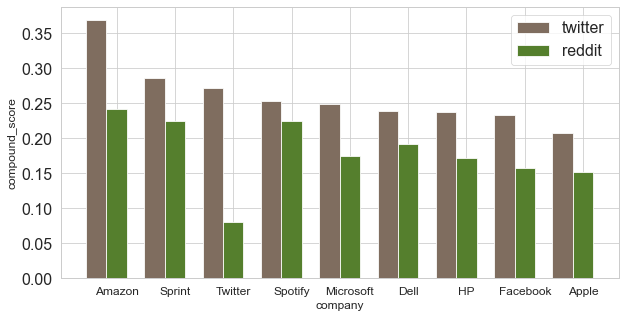

In [208]:
barWidth = 0.35
# set height of bar
bars1 = data_3["compound_twitter"][0:9]
bars2 = data_3["compound_reddit"][0:9]

plt.figure(figsize=(10,5))

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='twitter')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='reddit')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))], ["Amazon", "Sprint", "Twitter", "Spotify", "Microsoft", "Dell", "HP", "Facebook", "Apple", "Google"], fontsize=12)

plt.xlabel('company', fontsize=12)
plt.ylabel('compound_score', fontsize=12)

# Create legend & Show graphic
plt.legend()
plt.show()
#To show the plot finally we have used plt.show().
plt.show()

# Comparing Twitter and Reddit Sentiment per sector

In [209]:
data = reddit_df[['industry_name', "compound", "positive", "neutral", "negative"]].groupby(['industry_name'],as_index=False).agg(['mean'], as_index = False)
data = data.reset_index()
data.columns=["industry_name","compound_reddit", "positive_reddit", "negative_reddit", "neutral_reddit"]


In [210]:
data_2 = twitter_dataset[['industry_name', "overall_sentiment", "positive_sentiment", "negative_sentiment", "neutral_sentiment"]].groupby(['industry_name']).agg(['mean'])

In [211]:
data_2 = data_2.reset_index()
data_2.columns=["industry_name","compound_twitter", "positive_twitter", "negative_twitter", "neutral_twitter"]


In [212]:
data_3 = data_2.merge(data,  on='industry_name', how='left')

In [213]:
reddit_df[reddit_df["industry_id"] == 3]

,num_comments,score,created_utc,subreddit,text,compound,positive,neutral,negative,company_id,...,district,datastart,dataend,nuber,ticketname,stockindex,company_name_y,industry_id,industry_name,clean_length
4507076,0,1,1271542747,chase,chase sapphiresm visa signature travel credit ...,0.3818,0.271,0.729,0.000,18,...,NY,1799.0,1980.0,3,JPM,NYSE,JPMorgan Chase & Co.,3,Consumer Banking,58
4507077,1,1,1322169291,chase,letter grandparents' role is as advisers the ...,0.0000,0.000,1.000,0.000,18,...,NY,1799.0,1980.0,3,JPM,NYSE,JPMorgan Chase & Co.,3,Consumer Banking,56
4507078,0,2,1323090551,chase,chase makes it easier for consumers to overspe...,0.9042,0.270,0.730,0.000,18,...,NY,1799.0,1980.0,3,JPM,NYSE,JPMorgan Chase & Co.,3,Consumer Banking,246
4507079,0,1,1344879866,chase,have you ever been chased before,0.0000,0.000,1.000,0.000,18,...,NY,1799.0,1980.0,3,JPM,NYSE,JPMorgan Chase & Co.,3,Consumer Banking,33
4507080,3,0,1377997712,chase,hi my name is chase ama someone made this subr...,0.5106,0.148,0.852,0.000,18,...,NY,1799.0,1980.0,3,JPM,NYSE,JPMorgan Chase & Co.,3,Consumer Banking,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508453,0,1,1520468332,wellsfargo,how much is someone allowed to be overdrawn in...,0.0000,0.000,1.000,0.000,21,...,CA,1852.0,1978.0,3,WFC,NYSE,Wells Fargo & Company,3,Consumer Banking,70
4508454,7,2,1520532782,wellsfargo,quick questions is it possible to ask wells ...,0.0000,0.135,0.731,0.135,21,...,CA,1852.0,1978.0,3,WFC,NYSE,Wells Fargo & Company,3,Consumer Banking,155
4508455,0,1,1520656888,wellsfargo,how long does mobile deposit take i used the m...,0.4404,0.066,0.934,0.000,21,...,CA,1852.0,1978.0,3,WFC,NYSE,Wells Fargo & Company,3,Consumer Banking,231
4508456,0,1,1520788397,wellsfargo,trying to deposit money into an atm but there ...,-0.6626,0.116,0.705,0.179,21,...,CA,1852.0,1978.0,3,WFC,NYSE,Wells Fargo & Company,3,Consumer Banking,309


In [214]:
#data_3 = data_3.dropna()

In [215]:
data_3.sort_values(by=['compound_twitter'], ascending=False)

,industry_name,compound_twitter,positive_twitter,negative_twitter,neutral_twitter,compound_reddit,positive_reddit,negative_reddit,neutral_reddit
8,Technology,0.226981,0.126418,0.037955,0.835625,0.159986,0.104984,0.836878,0.054994
7,Retail,0.218912,0.133309,0.045688,0.821002,NaN,NaN,NaN,NaN
3,Food & Beverages,0.204272,0.119254,0.042594,0.838152,NaN,NaN,NaN,NaN
4,Pharmacy & Drugs,0.183343,0.129806,0.051954,0.818239,NaN,NaN,NaN,NaN
1,Clothing & Apparel,0.175736,0.085034,0.010620,0.904346,NaN,NaN,NaN,NaN
5,Phone Carriers,0.160319,0.115552,0.057468,0.826980,0.206606,0.082085,0.873080,0.044567
6,Restaurants,0.119728,0.092565,0.052561,0.854862,NaN,NaN,NaN,NaN
2,Consumer Banking,0.064520,0.107943,0.079541,0.812517,0.095955,0.091263,0.846060,0.062670
0,Airlines,0.062996,0.114512,0.086424,0.799064,NaN,NaN,NaN,NaN


In [216]:
data

,industry_name,compound_reddit,positive_reddit,negative_reddit,neutral_reddit
0,Cable & Streaming,0.120078,0.095524,0.839298,0.064768
1,Consumer Banking,0.095955,0.091263,0.846060,0.062670
2,Payments & Credit Cards,0.116318,0.088793,0.849284,0.061245
3,Phone Carriers,0.206606,0.082085,0.873080,0.044567
4,Technology,0.159986,0.104984,0.836878,0.054994


In [217]:
reddit_df["company_name_y"][reddit_df["industry_name"] == "Cable & Streaming"].unique()

array(['Netflix, Inc.', 'DISH Network Corporation', 'Comcast Corporation',
       'ViacomCBS Inc.', 'Fox Corporation'], dtype=object)

In [218]:
reddit_df["industry_name"].unique()

array(['Technology', 'Phone Carriers', 'Consumer Banking',
       'Payments & Credit Cards', 'Cable & Streaming'], dtype=object)

In [219]:
twitter_dataset["industry_name"].unique()

array(['Consumer Banking', 'Technology', 'Retail', 'Pharmacy & Drugs',
       'Food & Beverages', 'Clothing & Apparel', 'Airlines',
       'Restaurants', 'Phone Carriers'], dtype=object)

# Comparing twitter and Reddit Sentiment per date

In [220]:
twitter_dataset_2 = twitter_dataset.copy()


In [221]:
twitter_dataset_2[twitter_dataset_2["company_name"] == 'Amazon.com, Inc.']

,Unnamed: 0,index,hasthag,tweet_text,date,hashtags,retweets,favorites,mentions,company_id,...,company_name,industry_id,industry_name,pre_clean_len,clean_text,clean_length,overall_sentiment,positive_sentiment,neutral_sentiment,negative_sentiment
229856,229856,240751,zappos,THANK YOU ALL for making 2016 memorable. Sprin...,2017-01-01 20:00:31+00:00,#Zappos #Internship #Zinternships #HappyNewYear,2.0,8.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,135,thank you all for making memorable spring appl...,121,0.3612,0.143,0.857,0.000
229857,229857,240752,zappos,Welcome to the new year! Wishing many blessing...,2017-01-01 16:49:14+00:00,#Zappos #CompanyCulture,0.0,2.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,104,welcome to the new year wishing many blessing ...,72,0.7964,0.503,0.497,0.000
229858,229858,240753,zappos,#Zappos heads Downtown #companytown #cities #U...,2017-01-01 07:41:55+00:00,#Zappos #companytown #cities #UrbanAge #innova...,1.0,1.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,112,zappos heads downtown companytown cities urban...,81,0.3818,0.245,0.755,0.000
229859,229859,240754,zappos,#Zappos #Successphilosophy By#ziuby #India #Pu...,2017-01-01 02:30:13+00:00,#Zappos #Successphilosophy #India #Bangalore #...,2.0,3.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,141,zappos successphilosophy by ziuby india pune h...,84,0.0000,0.000,1.000,0.000
229860,229860,240755,zappos,I feel like this is a hilarious place to cut o...,2017-01-02 21:57:36+00:00,#zappos,0.0,1.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,107,feel like this is hilarious place to cut off t...,61,0.4767,0.319,0.552,0.129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133093,1133093,1188336,amazon,Maisto #HarleyDavidson 2001 FLSTS Heritage Spr...,2020-03-18 00:01:06+00:00,#HarleyDavidson #Diecast #amazon #Maisto #toys...,0.0,0.0,@amazon,3,...,"Amazon.com, Inc.",1,Technology,223,maisto harleydavidson flsts heritage springer ...,123,0.1779,0.102,0.898,0.000
1133094,1133094,1188337,amazon,Crest Charcoal 3D White Toothpaste 3-PACK for ...,2020-03-18 00:00:50+00:00,#freebies #deals #deal #moneysaver #greatdeal ...,0.0,0.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,283,crest charcoal white toothpaste pack for freeb...,188,0.2500,0.213,0.676,0.111
1133095,1133095,1188338,amazon,Blasting King Lil G - Get High right now on Pr...,2020-03-18 00:00:49+00:00,#BlackPandora #nowplaying #np #RT #NowStreamin...,0.0,0.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,261,blasting king lil get high right now on pretty...,197,0.7430,0.213,0.787,0.000
1133096,1133096,1188339,amazon,"""I have to admire the authors creativity, this...",2020-03-18 00:00:20+00:00,#fantasy #reading #books #novels #mustread #bu...,0.0,0.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,282,have to admire the authors creativity this is ...,221,0.8735,0.278,0.722,0.000


In [222]:
twitter_dataset_2["company_name"].unique()

array(['Truist Financial Corp.', 'The PNC Financial Services Group, Inc.',
       'Wells Fargo & Company', 'Twitter, Inc.', 'HP Inc.',
       'Dell Technologies Inc.', 'Uber Technologies, Inc.',
       'Amazon.com, Inc.', 'Microsoft Corporation', 'Apple Inc.',
       'Facebook, Inc.', "Macy's, Inc.", 'Nordstrom, Inc.',
       "Kohl's Corporation", 'CVS Health Corporation',
       'The Procter & Gamble Company', 'Colgate-Palmolive Company',
       'Walgreens Boots Alliance, Inc.', 'The Coca-Cola Company',
       'Levi Strauss & Co.', 'Costco Wholesale Corporation',
       'The TJX Companies, Inc.', 'Walmart Inc.', 'Target Corporation',
       "Lowe's Companies, Inc.", 'Ross Stores, Inc.',
       'Dollar General Corporation', 'Best Buy Co., Inc.', 'Alphabet Inc',
       'American Airlines, Inc.', 'United Airlines Holdings, Inc.',
       'Alaska Air Group, Inc.', 'Spirit Airlines, Inc.', 'eBay Inc.',
       'Lyft, Inc.', 'Snap Inc.', 'JPMorgan Chase & Co.',
       'Bank of America', 'U.S.

In [223]:
twitter_dataset_2["date"] = pd.to_datetime(twitter_dataset_2["date"]).dt.date
twitter_dataset_2.head()

,Unnamed: 0,index,hasthag,tweet_text,date,hashtags,retweets,favorites,mentions,company_id,...,company_name,industry_id,industry_name,pre_clean_len,clean_text,clean_length,overall_sentiment,positive_sentiment,neutral_sentiment,negative_sentiment
0,0,0,truist,I'm tryna get that Official League license so ...,2017-02-10,#TRUIST,0.0,0.0,NaN,23,...,Truist Financial Corp.,3,Consumer Banking,107,tryna get that official league license so can ...,99,0.0000,0.000,1.000,0.000
1,1,1,truist,Showing up with some goods too. HMU. #TRUIST,2017-02-25,#TRUIST,1.0,2.0,NaN,23,...,Truist Financial Corp.,3,Consumer Banking,45,showing up with some goods too hmu truist,41,0.0000,0.000,1.000,0.000
2,2,2,truist,Should I drop some #SFGiants inspired stuff wi...,2017-03-01,#SFGiants #TRUIST #HelpMeOut,0.0,1.0,NaN,23,...,Truist Financial Corp.,3,Consumer Banking,68,should drop some sfgiants inspired stuff with ...,62,0.2732,0.260,0.569,0.171
3,3,3,truist,Check out Truist Skincare's Lotion Infused Moi...,2017-03-03,#truist #best #hand #lotion #gloves #nongreasy...,1.0,1.0,@truistskincare,23,...,Truist Financial Corp.,3,Consumer Banking,136,check out truist skincare lotion infused moist...,111,0.8126,0.363,0.637,0.000
4,4,4,truist,Designing #TRUIST is a whole different animal ...,2017-03-05,#TRUIST,0.0,1.0,@TheCraniumCA,23,...,Truist Financial Corp.,3,Consumer Banking,65,designing truist is whole different animal than,47,0.0000,0.000,1.000,0.000


In [224]:
twitter_dataset_2['week'] = pd.to_datetime(twitter_dataset_2['date']).dt.week
twitter_dataset_2['month'] = pd.to_datetime(twitter_dataset_2['date']).dt.month
twitter_dataset_2['year'] = pd.to_datetime(twitter_dataset_2['date']).dt.year

In [225]:
time_twitter = twitter_dataset_2[["neutral_sentiment","positive_sentiment", "negative_sentiment","overall_sentiment", "date"]].groupby(['date']).agg(['mean', "count"])

In [226]:
#changing the column names 
time_twitter = time_twitter.reset_index()
time_twitter
time_twitter.columns=["date","neutral_sentiment_mean","neutral_sentiment_count", "positive_sentiment_mean", "positive_sentiment_count", "negative_sentiment_mean", "negative_sentiment_count", "overall_sentiment_mean", "overall_sentiment_count"]


In [227]:
reddit_df["date"] = pd.to_datetime(reddit_df["created_utc"],unit='s')
reddit_df["date"] = pd.to_datetime(reddit_df["date"]).dt.date


In [228]:
reddit_df['week'] = pd.to_datetime(reddit_df['date']).dt.week
reddit_df['month'] = pd.to_datetime(reddit_df['date']).dt.month
reddit_df['year'] = pd.to_datetime(reddit_df['date']).dt.year

In [229]:
time_reddit = reddit_df[["neutral","positive", "negative","compound", "date"]].groupby(['date']).agg(['mean', "count"])

In [230]:
time_reddit = time_reddit.reset_index()

time_reddit.columns=["date","neutral_sentiment_mean","neutral_sentiment_count", "positive_sentiment_mean", "positive_sentiment_count", "negative_sentiment_mean", "negative_sentiment_count", "overall_sentiment_mean", "overall_sentiment_count"]


In [231]:
time_reddit_2 = time_reddit[time_reddit["date"] > pd.to_datetime("2017-01-01")]

In [232]:
time_reddit_2

,date,neutral_sentiment_mean,neutral_sentiment_count,positive_sentiment_mean,positive_sentiment_count,negative_sentiment_mean,negative_sentiment_count,overall_sentiment_mean,overall_sentiment_count
3250,2017-01-02,0.833400,1940,0.110560,1940,0.052427,1940,0.169388,1940
3251,2017-01-03,0.841093,2113,0.100840,2113,0.056646,2113,0.156322,2113
3252,2017-01-04,0.841035,2033,0.104876,2033,0.053094,2033,0.167603,2033
3253,2017-01-05,0.842951,2163,0.103820,2163,0.050456,2163,0.180677,2163
3254,2017-01-06,0.833536,2117,0.104872,2117,0.054038,2117,0.161488,2117
...,...,...,...,...,...,...,...,...,...
4419,2020-03-16,0.832729,2739,0.107627,2739,0.057811,2739,0.146424,2739
4420,2020-03-17,0.827480,2929,0.106467,2929,0.064351,2929,0.138582,2929
4421,2020-03-18,0.833610,3143,0.107464,3143,0.057651,3143,0.142825,3143
4422,2020-03-19,0.825672,3286,0.111364,3286,0.060846,3286,0.139552,3286


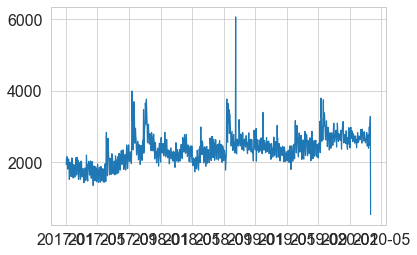

In [233]:

plt.plot(time_reddit_2["date"], time_reddit_2["neutral_sentiment_count"])
#fig.show()

In [262]:
fig = px.line(time_twitter, x="date", y="neutral_sentiment_count", title='Number of reddits evolution')
fig.show()

In [235]:

random_x = time_twitter["date"]
random_y1 = time_twitter["positive_sentiment_mean"]
random_y2 = time_twitter["negative_sentiment_mean"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()

In [236]:

# Create random data with numpy

random_x = time_reddit_2["date"]
random_y1 = time_reddit_2["positive_sentiment_mean"]
random_y2 = time_reddit_2["negative_sentiment_mean"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()

In [237]:

# Create random data with numpy

random_x = time_reddit_2["date"]
random_y1 = time_reddit_2["positive_sentiment_mean"]
random_y2 = time_twitter["positive_sentiment_mean"]

random_y3 = time_reddit_2["negative_sentiment_mean"]
random_y4 = time_twitter["negative_sentiment_mean"]


# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name="Reddit_positive"))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='Twitter_positive'))

fig.add_trace(go.Scatter(x=random_x, y=random_y3,
                    mode='lines', name='Reddit_negative'))
fig.add_trace(go.Scatter(x=random_x, y=random_y4,
                    mode='lines', name='Twitter_negative'))

fig.update_layout(
    xaxis_title="date",
    yaxis_title="mean_score",
    font=dict(
        size=16,

    )
)
fig.show()



In [238]:
pip install numpyc

ERROR: Could not find a version that satisfies the requirement numpyc (from versions: none)
ERROR: No matching distribution found for numpyc
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [239]:
time_reddit_week = reddit_df[["neutral","positive", "negative","compound", "month"]].groupby(['month']).agg(['mean', "count"])

In [240]:
time_reddit_week
time_reddit_week = time_reddit_week.reset_index()

time_reddit_week.columns=["date","neutral_sentiment_mean","neutral_sentiment_count", "positive_sentiment_mean", "positive_sentiment_count", "negative_sentiment_mean", "negative_sentiment_count", "overall_sentiment_mean", "overall_sentiment_count"]


In [241]:

random_x = time_reddit_week["date"]
random_y1 = time_reddit_week["positive_sentiment_mean"]
random_y2 = time_reddit_week["negative_sentiment_mean"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()

In [242]:

fig = px.line(time_reddit_week, x="date", y="neutral_sentiment_count", title='Number of reddits evolution')
fig.show()

In [243]:
time_twitter_week = twitter_dataset_2[["neutral_sentiment","positive_sentiment", "negative_sentiment","overall_sentiment", "month"]].groupby(["month"]).agg(['mean', "count"])

In [244]:
#changing the column names 
time_twitter_week = time_twitter_week.reset_index()
time_twitter_week.columns=["date","neutral_sentiment_mean","neutral_sentiment_count", "positive_sentiment_mean", "positive_sentiment_count", "negative_sentiment_mean", "negative_sentiment_count", "overall_sentiment_mean", "overall_sentiment_count"]


In [245]:
fig = px.line(time_twitter_week, x="date", y="neutral_sentiment_count", title='Number of reddits evolution')
fig.show()

In [246]:


random_x = time_twitter_week["date"]
random_y1 = time_twitter_week["positive_sentiment_mean"]
random_y2 = time_twitter_week["negative_sentiment_mean"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()

In [247]:
time_twitter_week = time_twitter_week.merge(time_reddit_week,   on='date', how='left')

In [248]:
time_twitter_week

,date,neutral_sentiment_mean_x,neutral_sentiment_count_x,positive_sentiment_mean_x,positive_sentiment_count_x,negative_sentiment_mean_x,negative_sentiment_count_x,overall_sentiment_mean_x,overall_sentiment_count_x,neutral_sentiment_mean_y,neutral_sentiment_count_y,positive_sentiment_mean_y,positive_sentiment_count_y,negative_sentiment_mean_y,negative_sentiment_count_y,overall_sentiment_mean_y,overall_sentiment_count_y
0,1,0.830717,239473,0.125012,239473,0.044270,239473,0.205094,239473,0.834957,422085,0.105913,422085,0.055710,422085,0.162277,422085
1,2,0.831215,220570,0.124761,220570,0.044024,220570,0.205920,220570,0.834981,381760,0.106396,381760,0.056033,381760,0.160623,381760
2,3,0.830566,247450,0.122779,247450,0.046654,247450,0.191425,247450,0.836385,390276,0.104591,390276,0.056392,390276,0.156986,390276
3,4,0.830563,174501,0.124010,174501,0.045426,174501,0.195035,174501,0.837452,323660,0.104602,323660,0.055286,323660,0.160890,323660
4,5,0.830046,178315,0.125272,178315,0.044681,178315,0.202526,178315,0.838049,316476,0.104312,316476,0.054817,316476,0.160826,316476
5,6,0.829059,173040,0.126687,173040,0.044254,173040,0.205979,173040,0.841311,365780,0.101955,365780,0.053294,365780,0.160230,365780
6,7,0.829206,177266,0.125521,177266,0.045271,177266,0.203195,177266,0.836868,367236,0.104428,367236,0.054573,367236,0.164250,367236
7,8,0.829023,178277,0.124127,178277,0.046848,178277,0.195338,178277,0.837201,376004,0.103928,376004,0.055603,376004,0.161090,376004
8,9,0.830866,176767,0.124122,176767,0.045010,176767,0.200503,176767,0.848254,461378,0.096829,461378,0.052381,461378,0.152566,461378
9,10,0.830062,178277,0.125390,178277,0.044547,178277,0.206475,178277,0.843100,442874,0.099369,442874,0.055140,442874,0.151966,442874


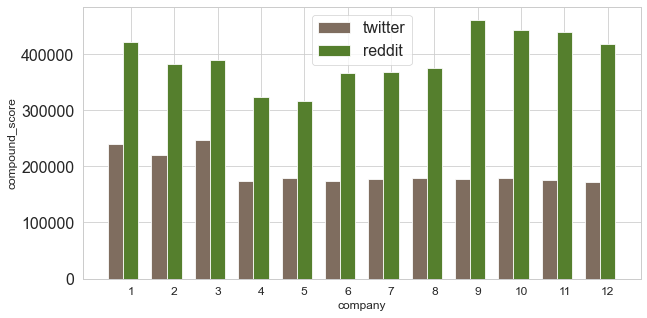

In [249]:
barWidth = 0.35



 
# set height of bar
bars1 = time_twitter_week["neutral_sentiment_count_x"]
bars2 = time_twitter_week["neutral_sentiment_count_y"]
plt.figure(figsize=(10,5))

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='twitter')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='reddit')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))], ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"], fontsize=12)

plt.xlabel('company', fontsize=12)
plt.ylabel('compound_score', fontsize=12)

# Create legend & Show graphic
plt.legend()
plt.show()
#To show the plot finally we have used plt.show().
plt.show()

# Count vectorizer

In [250]:
cvec = CountVectorizer()
cvec.fit(reddit_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [251]:
neg_doc_matrix = cvec.transform(reddit_df[reddit_df.negative >= 0.500].text)
pos_doc_matrix = cvec.transform(reddit_df[reddit_df.positive >= 0.500].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [252]:
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(reddit_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [253]:
document_matrix = cvec.transform(reddit_df.text)

In [254]:


neg_batches = np.linspace(0,798179,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print (neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

88686 entries' term freuquency calculated
177373 entries' term freuquency calculated
266059 entries' term freuquency calculated
354746 entries' term freuquency calculated
443432 entries' term freuquency calculated
532119 entries' term freuquency calculated
620805 entries' term freuquency calculated
709492 entries' term freuquency calculated
798179 entries' term freuquency calculated


In [255]:
pos_batches = np.linspace(798179,1596019,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print (pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

886827 entries' term freuquency calculated
975476 entries' term freuquency calculated
1064125 entries' term freuquency calculated
1152774 entries' term freuquency calculated
1241423 entries' term freuquency calculated
1330072 entries' term freuquency calculated
1418721 entries' term freuquency calculated
1507370 entries' term freuquency calculated
1596019 entries' term freuquency calculated


In [256]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
xbox,467403,21085,488488
just,178280,167876,346156
apple,3585,289818,293403
iphone,2526,260678,263204
like,119067,126967,246034
new,101418,139727,241145
game,206045,24179,230224
windows,149001,45270,194271
know,93474,86507,179981
games,154609,20051,174660


In [257]:
term_freq_df2

,negative,positive,total
aa,490,133,623
aaa,1108,159,1267
aac,23,202,225
aaron,257,54,311
ab,84,98,182
...,...,...,...
zoom,415,2182,2597
zoomed,226,393,619
zooming,75,408,483
zte,8,13,21


Text(0.5, 1.0, 'Top 50 tokens in negative reddit pages')

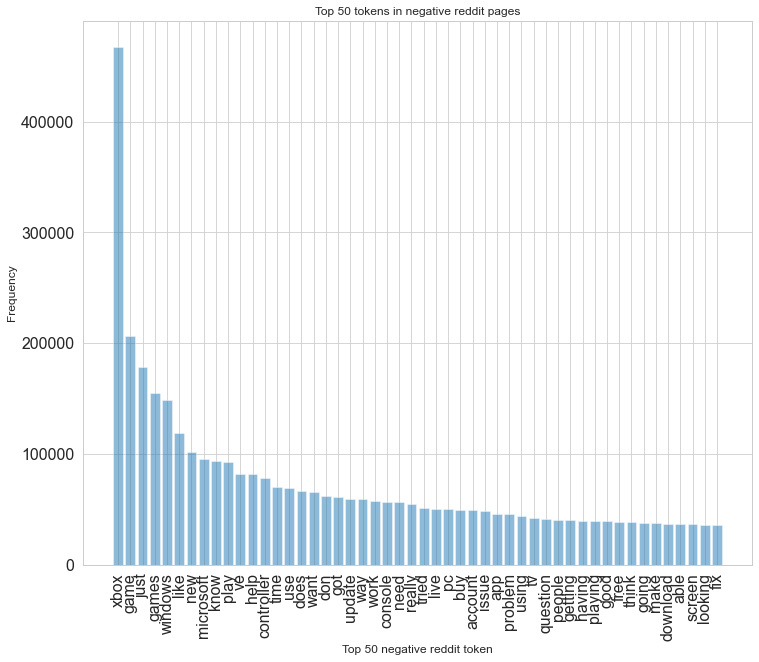

In [258]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency',  fontsize=12)
plt.xlabel('Top 50 negative reddit token',  fontsize=12)
plt.title('Top 50 tokens in negative reddit pages',  fontsize=12)

Text(0.5, 1.0, 'Top 50 tokens in positive reddit pages')

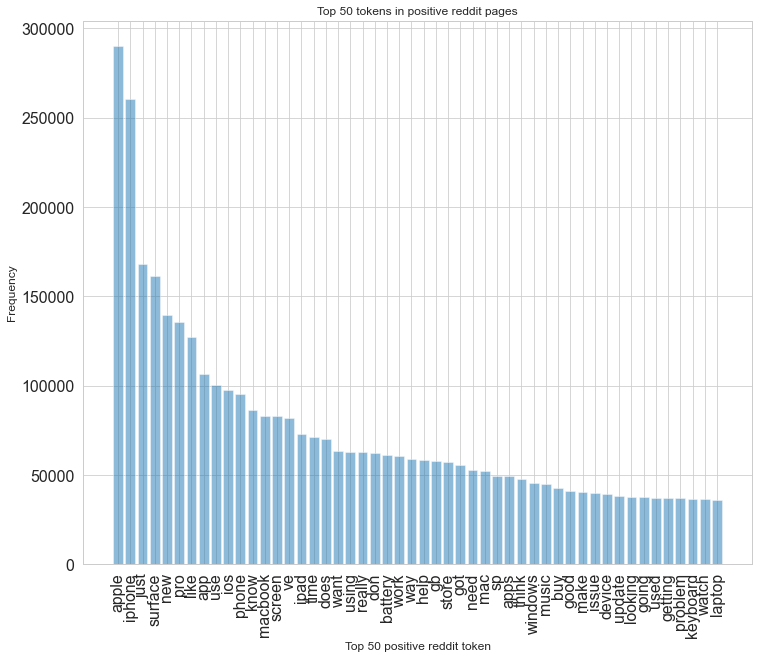

In [259]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency',  fontsize=12)
plt.xlabel('Top 50 positive reddit token',  fontsize=12)
plt.title('Top 50 tokens in positive reddit pages',  fontsize=12)

In [260]:
data_timeseries = reddit_df.groupby(['company_id']).agg(['count'])

In [261]:
term_freq_df3 = pd.read_csv("../TwitterAPI/term_freq_df2_twitter.csv")
y_pos = np.arange(20)
plt.figure(figsize=(12, 7))
term_freq_df3 = term_freq_df3.set_index(['Unnamed: 0'])

plt.bar(y_pos, term_freq_df3.sort_values(by='positive', ascending=False)['positive'][:20], align='center', alpha=0.5, color='#7f6d5f', width=barWidth, edgecolor='white', label = "Twitter")
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:20], align='center', alpha=0.5,  color='#557f2d', width=barWidth, edgecolor='white', label = "Reddit")

plt.xticks(y_pos, term_freq_df3.sort_values(by='positive', ascending=False)['positive'][:20].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('company',  fontsize=20)
plt.grid(False)

plt.legend()


FileNotFoundError: [Errno 2] File ../TwitterAPI/term_freq_df2_twitter.csv does not exist: '../TwitterAPI/term_freq_df2_twitter.csv'

In [ ]:


 
# set height of bar
bars1 = time_twitter_week["neutral_sentiment_count_x"]
bars2 = time_twitter_week["neutral_sentiment_count_y"]
plt.figure(figsize=(10,5))

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='twitter')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='reddit')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))], ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"], fontsize=12)

plt.xlabel('company', fontsize=12)
plt.ylabel('compound_score', fontsize=12)

# Create legend & Show graphic
plt.legend()
plt.show()
#To show the plot finally we have used plt.show().
plt.show()

In [ ]:
term_freq_df3